<a href="https://colab.research.google.com/github/suian888/Data-Analysis-with-Python/blob/main/pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import sklearn.decomposition as sd
import pandas as pd

**Upload the files**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pizza.csv to Pizza.csv


In [ ]:
df = pd.read_csv('Pizza.csv')
df

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76



## The compositional details of various pizza samples
*   **mois**: Moisture content, measured in percentage
*   **prot**: Protein content, measured in percentage
*   **fat**: Fat content, measured in percentage
*   **ash**: Ash content, measured in percentage
*   **sodium**: Sodium content, measured in percentage
*   **carb**: Carbohydrate content, measured in percentage
*   **cal**: Caloric value, measured in kilocalories (kcal) per unit weight



In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [ ]:
df.describe()

,id,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20841.040000,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,6962.917222,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,14003.000000,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,14093.750000,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,24020.500000,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,24110.250000,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,34045.000000,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


In [ ]:
x = df.drop(['brand', 'id'], axis=1)

**Clustering**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
np.arange(1,21)
inertia_list = []
for i in np.arange(1,21):
  kmn = KMeans(n_clusters=i)
  kmn.fit(x)
  inertia_list.append(kmn.inertia_)
inertia_list

[161588.00123633334,
 57219.777353731275,
 29190.077012940517,
 11436.22963734533,
 8061.151891667063,
 6418.579093306406,
 5439.431727800716,
 3211.0048331184335,
 2466.88129269721,
 2132.2407322519284,
 1859.4155365171807,
 1687.487124174649,
 1526.485078663345,
 1601.2069905950427,
 1329.0985840597018,
 1468.8634513091754,
 1190.7331300153028,
 1043.787476256462,
 1005.0486579405608,
 917.8256439874939]

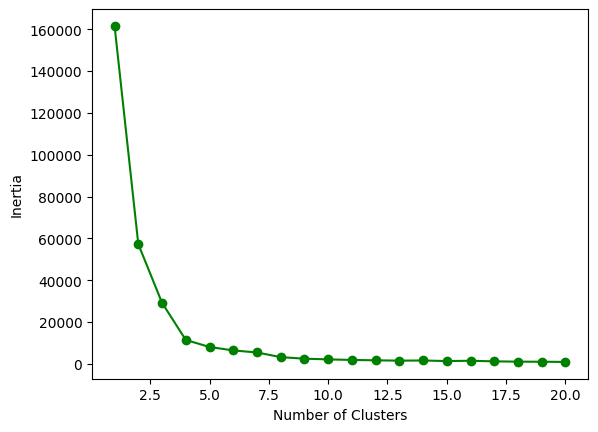

In [ ]:
plt.plot(np.arange(1,21),inertia_list,'o-',c='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

**Choose clusters = 5**

In [ ]:
kmn = KMeans(n_clusters=5)
kmn.fit(x)
Clusters = kmn.predict(x)
df['cluster'] = Clusters

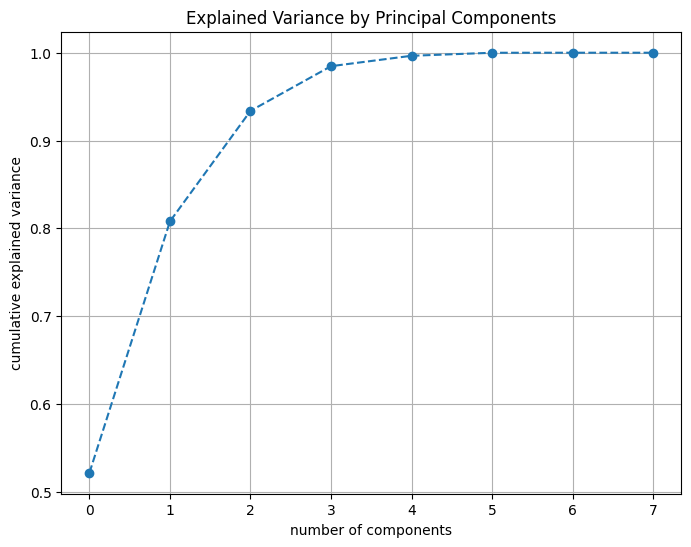

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

**Reduce the dimension to 3 with cumulative explained variance around 99%**

In [ ]:
# Reduce the dimension to 3
pca = sd.PCA(n_components=3)
X_reduced = pca.fit_transform(x)
df = pd.DataFrame(x, columns=x.columns)
df['PC1'] = X_reduced[:, 0]
df['PC2'] = X_reduced[:, 1]
df['PC3'] = X_reduced[:, 2]
df

,mois,prot,fat,ash,sodium,carb,cal,PC1,PC2,PC3
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93,-24.951748,-26.811668,-0.117293
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84,-24.611976,-25.659563,-0.029804
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95,-24.938419,-26.930571,-1.893282
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74,-24.325561,-23.523567,-1.309065
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67,-23.866048,-22.652813,0.315488
...,...,...,...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91,2.605257,5.291556,-1.794817
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10,1.451451,2.958572,-1.264187
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92,3.539501,5.670590,-1.271377
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76,1.767860,8.546536,-2.396790


In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=df['cluster'])
fig.show()